In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

<Figure size 640x480 with 0 Axes>

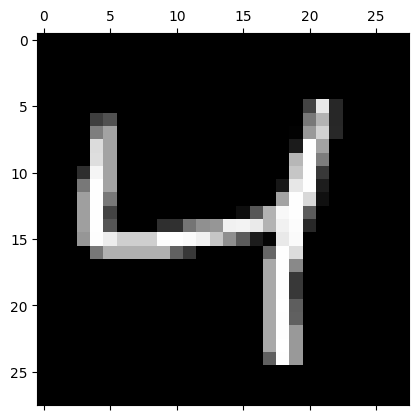

In [5]:
plt.gray()
plt.matshow(X_train[2])

## Flatten Our Dataset 

In [6]:
X_train = X_train /255
X_test = X_test / 255

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

## Create a Model

In [20]:
# 1. create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(10,activation='sigmoid')
])
# 2. compile the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

# 3. fit the model
model.fit(X_train_flattened,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8631 - loss: 0.4683
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9681 - loss: 0.1084
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9755 - loss: 0.0785
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9818 - loss: 0.0576
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9843 - loss: 0.0472
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9877 - loss: 0.0389
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9887 - loss: 0.0347
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9901 - loss: 0.0288
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9927 - loss: 0.0240
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9935 - loss: 0.0212


In [21]:
# Evaluate the accuracy
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9719 - loss: 0.1137


[0.09177936613559723, 0.9763000011444092]

In [14]:
# make prediction
y_predicted = model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [15]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

Text(95.72222222222221, 0.5, 'Truth')

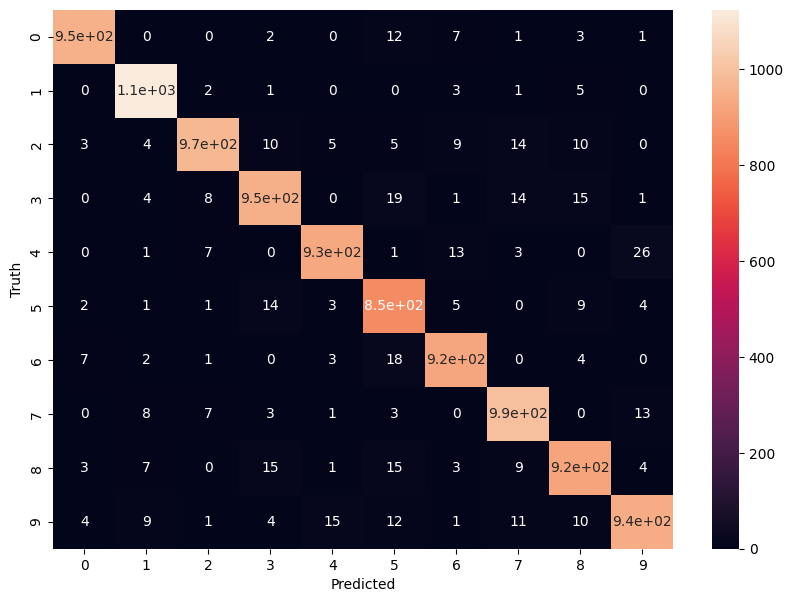

In [16]:
import seaborn as sns
plt.figure(figsize=(10,7))
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [17]:
# 1. create a model using the sequential API
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    tf.keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
# 2. compile the model
model_2.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

# 3. fit the model
history = model_2.fit(X_train_flattened,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8749 - loss: 0.4391
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9609 - loss: 0.1313
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9735 - loss: 0.0896
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9794 - loss: 0.0674
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9852 - loss: 0.0517
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9881 - loss: 0.0385
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9918 - loss: 0.0316
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9916 - loss: 0.0267
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9942 - loss: 0.0193
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9950 - loss: 0.0168


Text(0, 0.5, 'Accuracy')

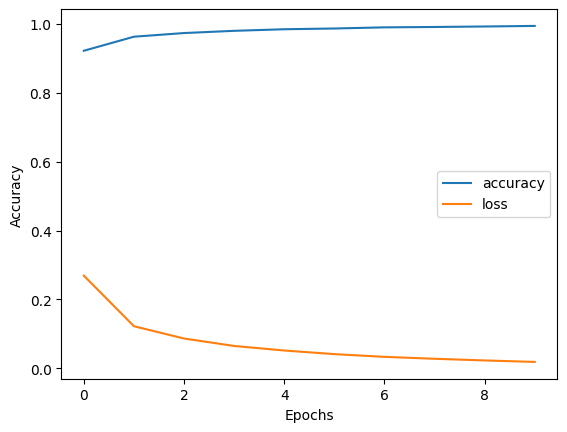

In [18]:
import pandas as pd
pd.DataFrame(history.history).plot()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

In [19]:
model_2.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9727 - loss: 0.0917


[0.08239594101905823, 0.9768999814987183]